# bilibili百大up主的研究

### 1.爬取百大up和非百大up相关数据
### 2.数据处理
### 3.可视化和logistic回归

### 第一步：数据爬取，利用selenium包进行数据抓取
### 百大up主是b站评选出的过去一年拥有出色表现的100位UP主。
### 需要用到的框架：
### selenium自动化测试框架:爬取信息
### time：生成随机暂停防止反爬
### numpy:生成随机数
### re：数据清洗。以列表的形式返回up主的UID
### csv：读写CSV文件


# 下面为第一步爬取数据的代码

In [29]:
# -*- coding: UTF-8 -*-

import selenium.webdriver as wb  # 爬虫框架/自动化测试框架
import time  # 随机休眠，防止反爬机制
import numpy as np  # 处理数组用
import csv  # 处理数据，存储和读取CSV文件
import re  # 正则表达式


def init_csv(filepath='test.csv'):
    headers = ['UP昵称', '会员等级', '会员类别', '关注', '粉丝', '获赞', '播放', '生日', '投稿']#最后文件的标题行
    with open(filepath, 'w', newline='', encoding='utf-8')as f:#w指直接写入
        f_csv = csv.writer(f)
        f_csv.writerow(headers)#创建文件，写入标题行


def write_csv(filepath, datas):
    with open(filepath, 'a+', newline='', encoding='utf-8')as f:#
        f_csv = csv.writer(f)
        f_csv.writerow(datas)#每爬取一行数据就写入


def read_uid(filepath):
    x = []
    with open(filepath, 'r', newline='', encoding='utf-8')as f:
        csv_read = csv.reader(f)
        for line in csv_read:
            line[0] = re.findall('\d+', line[0])[0]#正则化处理
            x.append(line[0])
    return x


class Spider(object):#定义一个爬虫类

    def __init__(self, display=True) -> None:
        super().__init__()
        option = wb.ChromeOptions()
        # 忽略driver自身的警告|错误等输出
        option.add_experimental_option(
            'excludeSwitches', ['enable-logging'])
        # 禁用图片加载,加速爬取url等页面数据,图片数据待爬取url后由requests库实现
        # option.add_experimental_option(
        #     'prefs', {"profile.managed_default_content_settings.images": 2})
        if display == False:
            option.headless = True
            print('程序运行，设置为无窗口模式')

        ################    Chrome程序地址改这里
        option.binary_location = r"C:\Program Files (x86)\Google\Chrome\Application\chrome.exe"
        # 浏览器驱动器初始化，需指明路径与参数
        ################    Chrome驱动器地址改这里，改try里的那个就行
        try:
            self.driver = wb.Chrome(
                r"C:\Users\dell\Downloads\chromedriver.exe", options=option)
        except:
            self.driver = wb.Chrome(
                r"C:\Users\Ludy_Lab\Desktop\workspace\assets\chromedriver.exe", options=option)

    def login(self):
        self.driver.get('https://space.bilibili.com/' + '51896064')
        self.random_sleep(2)
        login_elm = self.driver.find_element_by_css_selector(
            '#internationalHeader > div > div > div.nav-user-center > div.user-con.logout > div:nth-child(1) > div > span > div > span')
        #找到登陆按钮的元素
        login_elm.click()#要求点击
        wds = self.driver.window_handles#点击之后弹出到一个新的网页
        self.driver.switch_to.window(wds[-1])#返回到上一个网页
        self.random_sleep(2)
        username_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-username')
        password_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#login-passwd')
        login2_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#geetest-wrap > div > div.btn-box > a.btn.btn-login')#登录界面的登陆按钮

        ################################
        # 账号密码改这里
        username_elm.send_keys('15029220381')#输入账号
        password_elm.send_keys('g123456')#输入密码
        self.random_sleep(1)
        login2_elm.click()
        # 12秒的时间进行人机结合登录=_=
        time.sleep(12)

    def random_sleep(self, delay=3):
        tmp = np.random.random()#随机数0-1
        time.sleep(delay * (tmp + 0.5))#每爬一个网页随机暂停几秒

    def fetch_by_UID(self, UID='51896064'):
        self.driver.get('https://space.bilibili.com/' + UID)
        self.random_sleep(3)

        up_name_elm = self.driver.find_element_by_css_selector('#h-name')
        print(up_name_elm.text)
        up_name = up_name_elm.text

        up_level_elm: wb.remote.webdriver.WebElement = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-level.m-level')
        print(up_level_elm.get_attribute('lvl'))
        up_level = up_level_elm.get_attribute('lvl')

        up_member_elm = self.driver.find_element_by_css_selector(
            '#app > div.h > div.wrapper > div.h-inner > div.h-user > div > div.h-basic > div:nth-child(1) > a.h-vipType')
        print(up_member_elm.text)
        up_member = up_member_elm.text

        up_follow_elm = self.driver.find_element_by_css_selector('#n-gz')
        print(up_follow_elm.text)
        up_follow = up_follow_elm.text

        up_followby_elm = self.driver.find_element_by_css_selector('#n-fs')
        print(up_followby_elm.text)
        up_followby = up_followby_elm.text

        up_getzan_elm = self.driver.find_element_by_css_selector('#n-bf')
        print(up_getzan_elm.text)
        up_getzan = up_getzan_elm.text

        up_numofplay_elm = self.driver.find_element_by_xpath(
            '/html/body/div[2]/div[2]/div/div[1]/div[3]/div[2]/p[2]')
        print(up_numofplay_elm.text)
        up_numofplay = up_numofplay_elm.text

        birthday = 'None'
        try:
            birthday = self.driver.find_element_by_css_selector(
                '#page-index > div.col-2 > div.section.user > div.info > div.content > div > div > div.item.birthday > span.text').text
        except:
            pass
        print(birthday)

        up_tougao_elm = self.driver.find_element_by_css_selector(
            '#navigator > div > div.n-inner.clearfix > div.n-tab-links > a.n-btn.n-video.n-audio.n-article.n-album > span.n-num').text
        tougao = up_tougao_elm
        xiangbu = 'Error'
        try:
            up_tougao_elm = self.driver.find_element_by_xpath(
                '//*[@id="navigator"]/div/div[1]/div[1]/a[3]/span[2]')
            up_tougao_elm.click()
            self.random_sleep(3)
            up_xiangbu_elm = self.driver.find_element_by_css_selector(
                '#page-video > div > div.contribution-sidenav > div > div > ul > li:nth-child(4) > span')
            xiangbu = up_xiangbu_elm.text
        except:
            pass
        if xiangbu != 'Error':
            tougao = str(int(tougao) - int(xiangbu))
        print(tougao)
        self.random_sleep(2)
        return (up_name, up_level, up_member, up_follow, up_followby, up_getzan, up_numofplay, birthday, tougao)


if __name__ == "__main__":#从此开始执行
    # 用来保存爬虫结果的文件是下面这个，可以不新建
    csv_path = r'C:\Users\dell\Desktop\bilibli_ups22.csv'
    # 用来读取UID列表的csv文件是这个，excel要先另存为成csv，并且不要有标题行
    uid_path = r'C:\Users\dell\Desktop\bilibili40.csv'
    uid_list = read_uid(uid_path)#返回成一个列表
    worker = Spider(display=True)#spider是前面定义的一个爬虫类
    try:
        worker.login()
    except:
        print('登录失败')
        time.sleep(10)
        exit()

    try:
        init_csv(csv_path)#执行初始化CSV的函数
    except:
        pass

    for i in range(len(uid_list)):
        try:
            write_csv(csv_path, worker.fetch_by_UID(uid_list[i]))
            print('*' * 20 + '\n', i, 'success')
        except:
            print(i, 'error')
    time.sleep(10)
    # worker.random_sleep()


政宗君de情敌
6
年度大会员
207
33.3万
297.8万
5833.9万
01-02
0 error
花花与三猫CatLive
6
年度大会员
339
317.3万
2973.9万
3.9亿
07-11
238
********************
 1 success
老邪说电影
6
年度大会员
84
189.6万
1969.5万
3亿
04-08
392
********************
 2 success
LexBurner
6
年度大会员
34
944万
5160.8万
10.5亿
11-22
392
********************
 3 success
观视频工作室
6
年度大会员
64
370万
4373.8万
7.4亿
01-01
4 error
话很多的小姐姐们
6
年度大会员
35
161.9万
1030.6万
2.1亿
01-01
447
********************
 5 success
刘老师说电影
6
大会员
207
333.3万
1672.6万
4.6亿
11-16
544
********************
 6 success
胥渡吧
6
年度大会员
1
79.1万
400.7万
1.1亿
02-16
429
********************
 7 success
虫哥说电影
6
年度大会员
82
195.9万
1296.4万
2.7亿
None
266
********************
 8 success
蒲熠星
6
年度大会员
47
44.7万
53.1万
540.2万
None
55
********************
 9 success
3Blue1Brown
6

9
117.8万
54.2万
1792.4万
None
98
********************
 10 success
懒人厨房
6

7
59万
44.1万
923.9万
None
11 error
于译舒l哈哈的鱼头
5

52
12.1万
12.9万
414.7万
05-03
41
********************
 12 success
水果医生
6

1
27.4万
98.2万
3362.2万
None
71
********************
 13 su

# 第二步：数据整理与可视化
### 下面是数据处理与画图的包
### 运用numop、pandas、matplotlib等模块进行数据的整理与可视化

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #画图
import os

In [3]:
#内嵌画图
%matplotlib inline

In [4]:
#数据导入
#会员等级，会员类别，关注，粉丝，获赞，播放，投稿，是否百大
data = pd.read_excel('C:/Users/dell/Desktop/bilibilidata.xls')
data.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,6,0,254,3707000,10477000,160000000.0,121,1
1,6,1,197,3391000,23852000,260000000.0,202,1
2,6,0,117,1399000,6502000,110000000.0,158,1
3,6,1,376,3298000,18040000,190000000.0,186,1
4,6,1,0,3214000,6430000,370000000.0,468,1


In [38]:
data.shape#查看数据维度

(122, 8)

In [39]:
type(data)#数据类型

pandas.core.frame.DataFrame

In [40]:
#这部分检查用
data2 = pd.read_csv('C:/Users/dell/Desktop/UID100.csv')
data2.head()

,17409016
0,7552204
1,383513330
2,22141287
3,113362335
4,3682229


Text(0, 0.5, 'X5')

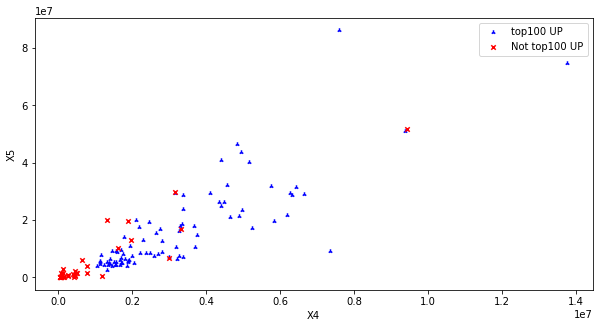

In [51]:
#散点图1
#指定两个部分
positive = data[data['Y'] == 1]
negative = data[data['Y'] == 0]

#指定画图参数（图像大小，变量,颜色，标签）
#figsize为图像大小，s为散点大小，c为散点颜色，marker为散点样式，label为标签
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(positive['X4'], positive['X5'], s = 20, c = 'b', marker = '2', label = 'top100 UP')
ax.scatter(negative['X4'], negative['X5'], s = 20, c = 'r', marker = 'x', label = 'Not top100 UP')
ax.legend()
ax.set_xlabel('X4')
ax.set_ylabel('X5')

In [14]:
#计算新变量
#粉丝留存率N1=粉丝数X4/视频播放量X6； 获赞率N2=获赞数X5/视频播放量X6； 平均播放量N3=视频播放量X6/作品数X7
N1 = data.X4/data.X6
N2 = data.X5/data.X6
N3 = data.X6/data.X7

In [29]:
#在data后新增列
data['N1'] = N1
data['N2'] = N2
data['N3'] = N3

In [30]:
#查看数据
data.head()

,X1,X2,X3,X4,X5,X6,X7,Y,N1,N2,N3
0,6,0,254,3707000,10477000,160000000.0,121,1,0.023169,0.065481,1.322314e+06
1,6,1,197,3391000,23852000,260000000.0,202,1,0.013042,0.091738,1.287129e+06
2,6,0,117,1399000,6502000,110000000.0,158,1,0.012718,0.059109,6.962025e+05
3,6,1,376,3298000,18040000,190000000.0,186,1,0.017358,0.094947,1.021505e+06
4,6,1,0,3214000,6430000,370000000.0,468,1,0.008686,0.017378,7.905983e+05


Text(0, 0.5, 'N2')

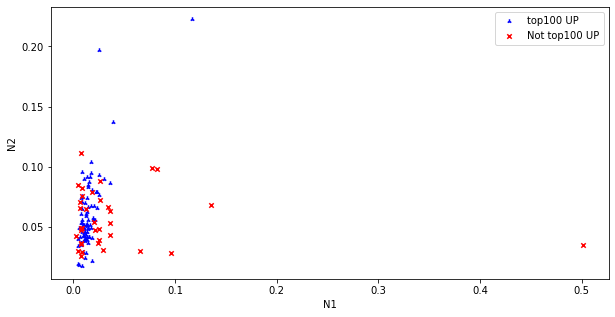

In [50]:
#散点图2
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(positive['N1'], positive['N2'], s = 20, c = 'b', marker = '2', label = 'top100 UP')
ax.scatter(negative['N1'], negative['N2'], s = 20, c = 'r', marker = 'x', label = 'Not top100 UP')
ax.legend()
ax.set_xlabel('N1')
ax.set_ylabel('N2')

Text(0, 0.5, 'N3')

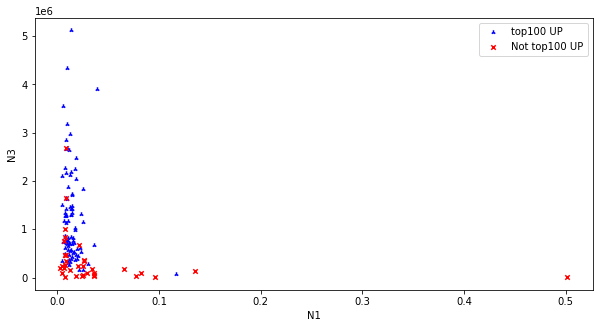

In [49]:
#散点图3
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(positive['N1'], positive['N3'], s = 20, c = 'b', marker = '2', label = 'top100 UP')
ax.scatter(negative['N1'], negative['N3'], s = 20, c = 'r', marker = 'x', label = 'Not top100 UP')
ax.legend()
ax.set_xlabel('N1')
ax.set_ylabel('N3')

Text(0, 0.5, 'N3')

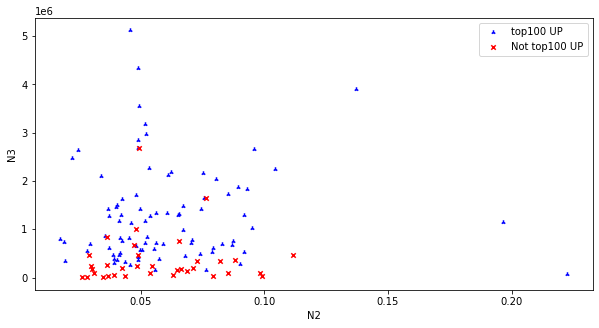

In [48]:
#散点图4
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(positive['N2'], positive['N3'], s = 20, c = 'b', marker = '2', label = 'top100 UP')
ax.scatter(negative['N2'], negative['N3'], s = 20, c = 'r', marker = 'x', label = 'Not top100 UP')
ax.legend()
ax.set_xlabel('N2')
ax.set_ylabel('N3')

Text(0.5, 0, 'N3')

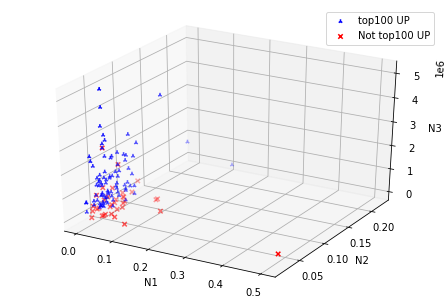

In [53]:
#绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(positive['N1'], positive['N2'], positive['N3'], s = 20, c = 'b', marker = '2', label = 'top100 UP')
ax.scatter(negative['N1'], negative['N2'], negative['N3'], s = 20, c = 'r', marker = 'x', label = 'Not top100 UP')
ax.legend()
ax.set_xlabel('N1')
ax.set_ylabel('N2')
ax.set_zlabel('N3')

# The logistic regression

### 目标：建立分类器（构造决策边界）求解参数
### 设定阈值，根据阈值判断结果
### ------

### sigmoid:映射到概率的函数
### model:返回预测结果值
### cost:根据参数计算损失
### gradient:计算每个参数的梯度方向
### descent:进行参数更新
### accuracy:计算精度
### ------

Logistic回归:处理二分类问题，输出的被解释变量y={0,1}。线性回归模型产生的预测值z=wx+b是一个实值，所以通过logistic模型将实值z转化成0/1值便可。

将是否为百大设置为被解释变量（y），将投稿数、平均播放量、平均弹幕数、平均点赞数、平均硬币数、主分区等作为解释变量（x）

logistic回归最重要的是要找到最佳的拟合参数，即w。使用的方法是梯度上升法。


In [62]:
# sigmoid函数
def sigmoid(z):
    return 1/(1 + np.exp(-z))

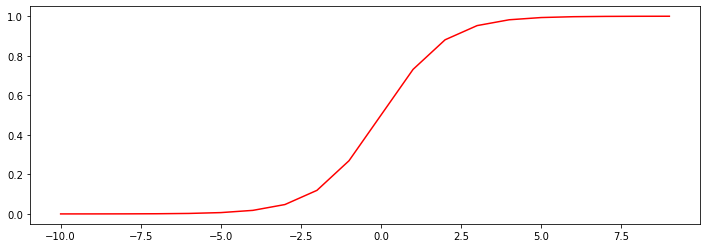

In [66]:
#这一步非必要，画sigmoid函数图
nums = np.arange(-10, 10, step = 1)
fig, ax = plt.subplots(figsize = (12,4))
ax.plot(nums, sigmoid(nums), 'r')

In [67]:
# g: R → [0,1]
# g(0) = 0.5
# g(-∞) = 0
# g(+∞) = 1

In [70]:
def model(X, theta):
    return sigmoid(np.dot(X, theta.T))

In [79]:
# 删掉无关列
del data['X3']
del data['X4']
del data['X5']
del data['X6']
del data['X7']

In [80]:
data.head()

,Y,N1,N2,N3
0,1,0.023169,0.065481,1.322314e+06
1,1,0.013042,0.091738,1.287129e+06
2,1,0.012718,0.059109,6.962025e+05
3,1,0.017358,0.094947,1.021505e+06
4,1,0.008686,0.017378,7.905983e+05


In [81]:
# 第二列插入常数列
data.insert(1, 'Ones', 1)

In [82]:
data.head()

,Y,Ones,N1,N2,N3
0,1,1,0.023169,0.065481,1.322314e+06
1,1,1,0.013042,0.091738,1.287129e+06
2,1,1,0.012718,0.059109,6.962025e+05
3,1,1,0.017358,0.094947,1.021505e+06
4,1,1,0.008686,0.017378,7.905983e+05


In [88]:
data.shape

(122, 5)

In [121]:
orig_data = data.iloc[0:122,0:5].values
cols = orig_data.shape[1] #列数
X = orig_data[:, 1:cols]
Y = orig_data[:, 0]

theta = np.zeros([1, 4])

In [122]:
X[:6]

array([[1.00000000e+00, 2.31687500e-02, 6.54812500e-02, 1.32231405e+06],
       [1.00000000e+00, 1.30423077e-02, 9.17384615e-02, 1.28712871e+06],
       [1.00000000e+00, 1.27181818e-02, 5.91090909e-02, 6.96202532e+05],
       [1.00000000e+00, 1.73578947e-02, 9.49473684e-02, 1.02150538e+06],
       [1.00000000e+00, 8.68648649e-03, 1.73783784e-02, 7.90598291e+05],
       [1.00000000e+00, 7.99545455e-03, 3.70136364e-02, 6.19718310e+05]])

In [123]:
Y[:6]

array([1., 1., 1., 1., 1., 1.])

In [124]:
theta

array([[0., 0., 0., 0.]])

In [125]:
X.shape, Y.shape, theta.shape

((122, 4), (122,), (1, 4))

In [131]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

In [132]:
type(theta)

numpy.ndarray

In [133]:
# 计算损失率
def cost(X, Y, theta):
    left = np.multiply(-Y, np.log(model(X, theta)))
    right = np.multiply(1 - Y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [134]:
cost(X, Y, theta)

84.56395602831333

In [135]:
# 计算梯度
def gradient(X, Y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - Y).ravel()
    for j in range(len(theta.ravel())):
        term = np.multiply(error, X[:,j])
        grad[0, j] = np.sum(term) / len(X)
        
    return grad

In [136]:
# 比较三种梯度下降方法
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2
# 设定三种不同的停止策略
def stopGriterion(type, value, threshold):
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold

In [137]:
import numpy.random

In [138]:
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    Y = data[:, cols-1:]
    return X, Y

In [139]:
import time

In [143]:
def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 梯度下降求解
    init_time = time.time()
    i = 0 # 迭代次数
    k = 0 # batch
    X, Y = shuffleData(data)
    grad = np.zeros(theta.shape) # 计算的梯度
    costs = [cost(X, Y, theta)] # 损失值
    
    while True:
        grad = gradient(X[k:k+batchSize],Y[k:k+batchSize], theta)
        k += batchSize # 取batch数量个数据
        if k >= n:
            k = 0
            X, Y = shuffleData(data) # 重新洗牌
        theta = theta - alpha*grad # 参数更新
        costs.append(cost(X, Y, theta)) # 计算新的损失
        i += 1
        
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopGriterion(stopType, value, thresh):break
            
    return theta, i-1, costs, grad, time.time() - init_time

In [147]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = 'Original' if (data[:,1]>2).sum() > 1 else 'Scaled'
    name += 'data - learning rate: {} - '.format(alpha)
    if batchSize == n: strDescType = 'Gradient'
    elif batchSize == 1: strDescType = 'Stochastic'
    else: strDescType = 'Mini-batch({})'.format(batchSize)
    name += strDescType + 'descent - Stop:'
    if stopType == STOP_ITER: strStop = '{} iterations'.format(thresh)
    elif stopType == STOP_COST: strStop = 'cost change < {}'.format(thresh)
    else: strType = 'gradient norm < {}'.format(thresh)
    name += strStop
    print ('***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s'.format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('cost')
    ax.set_title(name.upper() + 'Error vs. Iteration')
    return theta

<ipython-input-133-47a44032ab8f>:3: RuntimeWarning: divide by zero encountered in log
  right = np.multiply(1 - Y, np.log(1 - model(X, theta)))


***Scaleddata - learning rate: 1e-06 - Gradientdescent - Stop:5000 iterations
Theta: [[4556.68684847 5080.59470441   67.31523685  307.64330274]] - Iter: 5000 - Last cost: -inf - Duration: 1.15s


array([[4556.68684847, 5080.59470441,   67.31523685,  307.64330274]])

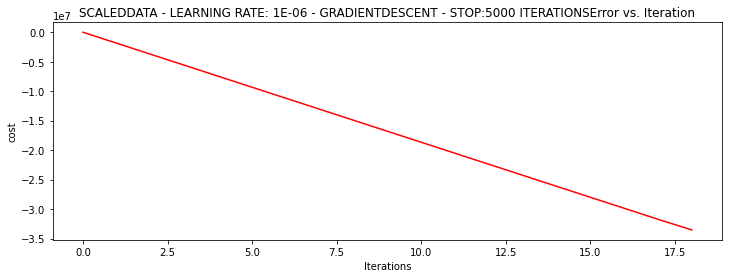

In [150]:
#不同的停止策略
#设定迭代次数
#选择的梯度下降方法是基于所有样本的
n = 122
runExpe(orig_data, theta, n, STOP_ITER, thresh=5000, alpha=0.000001)

In [159]:
# 精度
def predict(X, theta):
    return [1 if x>= 0.5 else 0 for x in model(X, theta)]